<h1> AWMCN Project


<h2> Sharjeel Ahmed **MSC-21S-009**

<h2> Filter Basics¶

> Filters are used in many disciplines. For example, image processing makes heavy use of 2D filters, where the input and output are images. You might use a filter every morning to make your coffee, which filters out solids from liquid. In DSP, filters are primarily used for:

> 1. Separation of signals that have been combined (e.g., extracting the signal youwant).
> 2. Removal of excess noise after receiving a signal
> 3. Restoration of signals that have been distorted in some way (e.g., an audio equalizer is a filter)





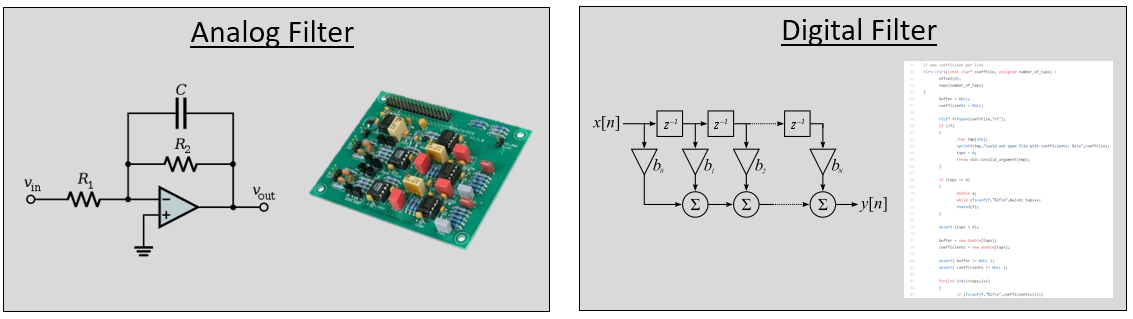

You cannot feed two different signals into a single filter without adding them together first or doing some other operation. Likewise, the output will always be one signal, i.e., a 1D array of numbers.
.
.

---

....


---



---




<h3>There are four basic types of filters: low-pass, high-pass, band-pass, and band-stop. Each type modifies signals to focus on different ranges of frequencies within them. The graphs below demonstrate how frequencies in signals are filtered for each type.



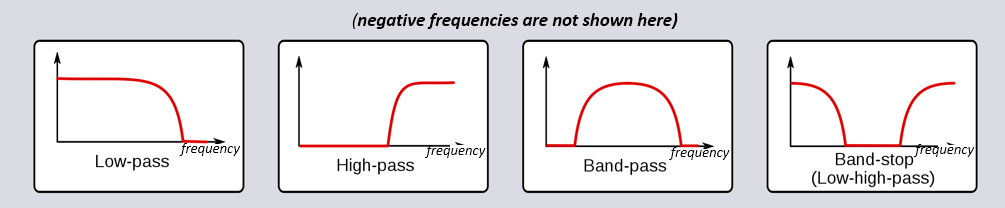

Each filter permits certain frequencies to remain from a signal while blocking other frequencies. The range of frequencies a filter lets through is known as the “passband”, and “stopband” refers to what is blocked. In the case of the low-pass filter, it passes low frequencies and stops high frequencies, so 0 Hz will always be in the passband. For a high-pass and band-pass filter, 0 Hz will always be in the stopband.




---
FIR, or Finite Impulse Response, type filters), we can represent the filter itself with a single array of floats. For filters symmetrical in the frequency domain, these floats will be real (versus complex), and there tends to be an odd number of them. We call this array of floats “filter taps”. We often use h as the symbol for filter taps. Here is an example of a set of filter taps, which define one filter:


<h2> Example of filter taps: </h1>
h =  [ 9.92977939e-04  1.08410297e-03  8.51595307e-04  1.64604862e-04
 -1.01714338e-03 -2.46268845e-03 -3.58236429e-03 -3.55412543e-03
 -1.68583512e-03  2.10562324e-03  6.93100252e-03  1.09302641e-02
  1.17766532e-02  7.60955496e-03 -1.90555639e-03 -1.48306750e-02
 -2.69313236e-02 -3.25659606e-02 -2.63400086e-02 -5.04184562e-03
  3.08099470e-02  7.64264738e-02  1.23536693e-01  1.62377258e-01
  1.84320776e-01  1.84320776e-01  1.62377258e-01  1.23536693e-01
  7.64264738e-02  3.08099470e-02 -5.04184562e-03 -2.63400086e-02
 -3.25659606e-02 -2.69313236e-02 -1.48306750e-02 -1.90555639e-03
  7.60955496e-03  1.17766532e-02  1.09302641e-02  6.93100252e-03
  2.10562324e-03 -1.68583512e-03 -3.55412543e-03 -3.58236429e-03
 -2.46268845e-03 -1.01714338e-03  1.64604862e-04  8.51595307e-04
  1.08410297e-03  9.92977939e-04]

In [2]:
h =  [-0.00025604525581002235, 0.00013669139298144728, 0.0005385575350373983,
0.0008378280326724052, 0.000906112720258534, 0.0006353431381285191,
-9.884083502996931e-19, -0.0008822851814329624, -0.0017323142383247614,
-0.0021665366366505623, -0.0018335371278226376, -0.0005912294145673513,
0.001349081052467227, 0.0033936649560928345, 0.004703888203948736,
0.004488115198910236, 0.0023609865456819534, -0.0013707970501855016,
-0.00564080523326993, -0.008859002031385899, -0.009428252466022968,
-0.006394983734935522, 4.76480351940553e-18, 0.008114570751786232,
0.015200719237327576, 0.018197273835539818, 0.01482443418353796,
0.004636279307305813, -0.010356673039495945, -0.025791890919208527,
-0.03587324544787407, -0.034922562539577484, -0.019146423786878586,
0.011919975280761719, 0.05478153005242348, 0.10243935883045197,
0.1458890736103058, 0.1762896478176117, 0.18720689415931702,
0.1762896478176117, 0.1458890736103058, 0.10243935883045197,
0.05478153005242348, 0.011919975280761719, -0.019146423786878586,
-0.034922562539577484, -0.03587324544787407, -0.025791890919208527,
-0.010356673039495945, 0.004636279307305813, 0.01482443418353796,
0.018197273835539818, 0.015200719237327576, 0.008114570751786232,
4.76480351940553e-18, -0.006394983734935522, -0.009428252466022968,
-0.008859002031385899, -0.00564080523326993, -0.0013707970501855016,
0.0023609865456819534, 0.004488115198910236, 0.004703888203948736,
0.0033936649560928345, 0.001349081052467227, -0.0005912294145673513,
-0.0018335371278226376, -0.0021665366366505623, -0.0017323142383247614,
-0.0008822851814329624, -9.884083502996931e-19, 0.0006353431381285191,
0.000906112720258534, 0.0008378280326724052, 0.0005385575350373983,
0.00013669139298144728, -0.00025604525581002235]


Software-Defined Radio (SDR):
we tune our SDR to a frequency of an existing signal, and we want to isolate it from other signals. Remember that we tell our SDR *(***Software-Defined Radio***)* which frequency to tune to, but the samples that the SDR captures are at baseband, meaning the signal will display as centered around 0 Hz. We will have to keep track of which frequency we told the SDR to tune to. Here is what we might receive:

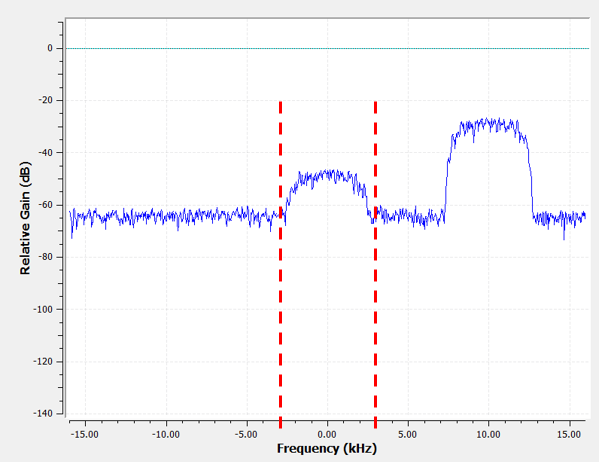

After creating and applying the filter with a cutoff freq of 3 kHz, we now have:



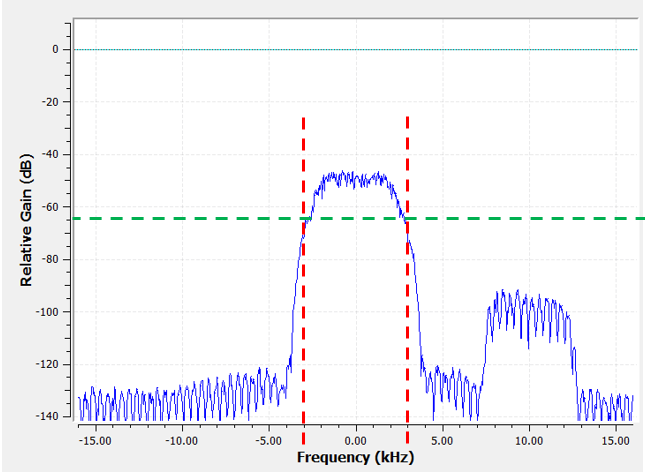

## This filtered signal will look confusing until you recall that our noise floor was at the green line around -65 dB. It’s **now** below where the noise floor was! We also removed most of the noise that existed in the stopband. In the filtering example above, we had used a cutoff of 3 kHz and a transition width of 1 kHz. The resulting filter had 77 taps.


#  Here is the frequency response of the filter we were just using:
PS: Not a signal

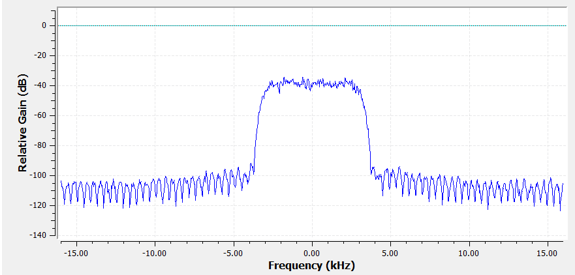

## A given filter also has a time domain representation; it’s called the “impulse response” of the filter because it is what you see in the time domain if you take an impulse and put it through the filter. (Google “Dirac delta function” for more info about what an impulse is). 

For a FIR Finite Impulse response type filter, the impulse response is simply the taps themselves. For that 77 tap filter we used earlier, the taps are:



---
taps verification:



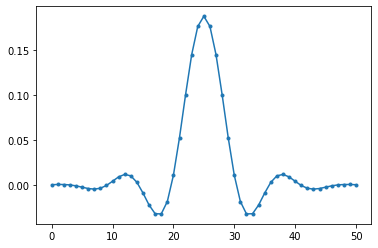

In [1]:
#filter design 


import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

num_taps = 51 # it helps to use an odd number of taps
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

# create our low pass filter
h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)

# plot the impulse response
plt.plot(h, '.-')
plt.show()

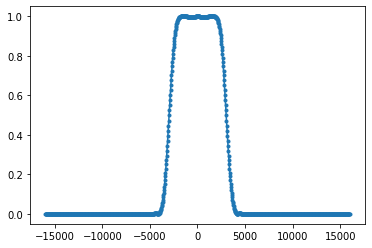

In [2]:
# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.plot(w, H, '.-')
plt.show()

# **Real vs. Complex Filters**

When the taps are real, the filter’s frequency response will be symmetrical around DC (0 Hz). Typically we use complex taps when we need asymmetry, which does not happen too often.

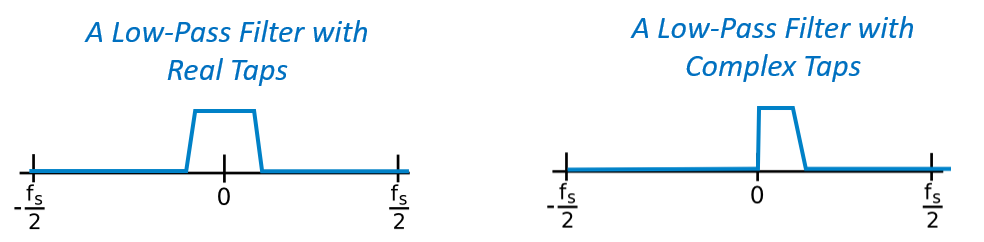

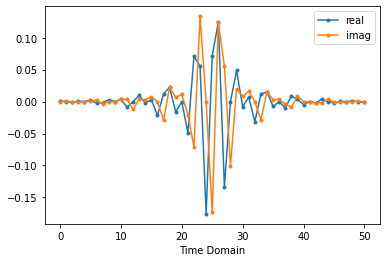

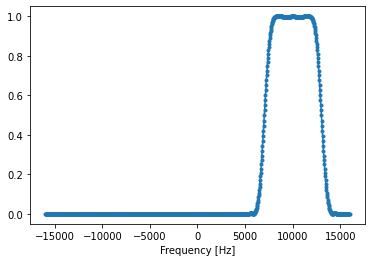

In [8]:
# (h was found using the first code snippet)

# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = 10e3 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
print("\n\n\n")

plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)
plt.xlabel('Time Domain')


# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')

plt.xlabel('Frequency [Hz]')
plt.show()

# **Filter Design Tools**
http://t-filter.engineerjs.com/


# Convolution

Convolution is another way to combine two signals into one, but it is very different than simply adding them. The convolution of two signals is like sliding one across the other and integrating. It is very similar to a cross-correlation, if you are familiar with that operation. Also known as cross-correlation in many cases.

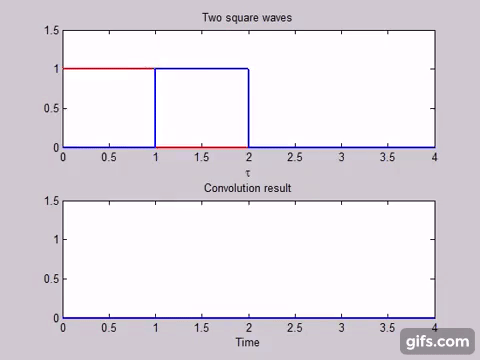

It is a Sliding integration

# What if we add Sq and Tringular wave................??????


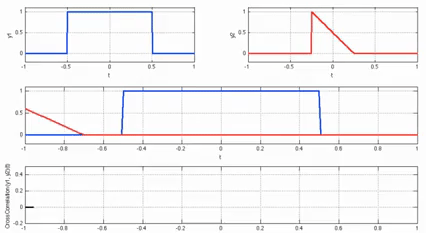

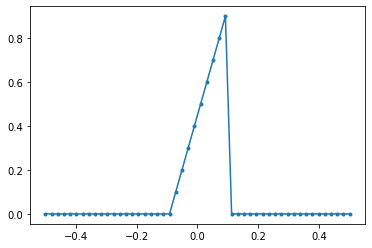

In [22]:
#Filter design in PY:

import numpy as np
import matplotlib.pyplot as plt
H = np.hstack((np.zeros(20), np.arange(10)/10, np.zeros(20)))
w = np.linspace(-0.5, 0.5, 50)
plt.plot(w, H, '.-')
plt.show()


# Our end goal is to find the taps of this filter so we can actually use it. How do we get the taps, given the frequency response?

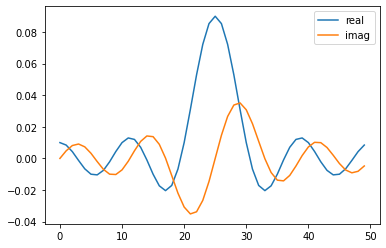

In [23]:
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))
plt.plot(np.real(h))
plt.plot(np.imag(h))
plt.legend(['real','imag'], loc=1)
plt.show()


In [ ]:
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()

In [ ]:
# After creating h using the previous code, create and apply the window
window = np.hamming(len(h))
h = h * window

H = np.hstack((np.zeros(200), np.arange(100)/100, np.zeros(200)))
w = np.linspace(-0.5, 0.5, 500)
plt.plot(w, H, '.-')
plt.show()
# (the rest of the code is the same)